In [8]:
%cd /home/pac/gits/phd/mri-online/

/home/pac/gits/phd/mri-online


In [9]:
import os
import time
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy as sp
import tikzplotlib as tikz
from project_utils import implot, imsave, load_data
from online.metrics import psnr_ssos, ssim_ssos, ssos

In [10]:
DATA_DIR = "data/"
PLOT_DIR = "plots/"
RESULT_DIR = "data/results/"
N_JOBS = 1

In [11]:
def save_fig(f, name,clean=True):
    if clean:
        tikz.clean_figure(f)
    tikz.save(PLOT_DIR+name+'.tikz', f,override_externals=True, axis_width="\\mywidth",axis_height="\\myheight")

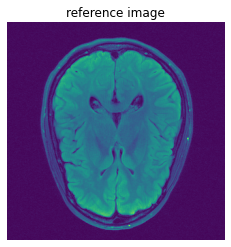

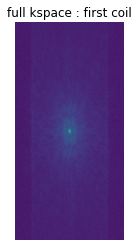

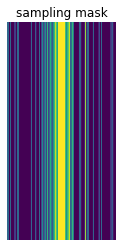

In [12]:
full_k, real_img, mask_loc, final_mask = load_data(DATA_DIR,1,monocoil=True)
square_mask= np.zeros(real_img.shape)
real_img_size = real_img.shape
img_size = [min(real_img.shape)]*2
square_mask[real_img_size[0] // 2 - img_size[0] // 2:real_img_size[0] // 2 + img_size[0] // 2,
            real_img_size[1] // 2 - img_size[1] // 2:real_img_size[1] // 2 + img_size[1] // 2] = 1


# use mono-coil data
final_k = full_k * final_mask
imsave(real_img, PLOT_DIR+'ground_truth.png')
imsave(np.sqrt(np.sqrt(np.abs(full_k))), PLOT_DIR+'kspace_full.png')
imsave(final_mask, PLOT_DIR+'mask.png')

f = implot(real_img, "reference image",mask=square_mask)
f = implot(np.sqrt(np.sqrt(np.abs(full_k))), "full kspace : first coil")
f = implot(final_mask, "sampling mask")

K_DIM = final_mask.shape
N_COILS = 1

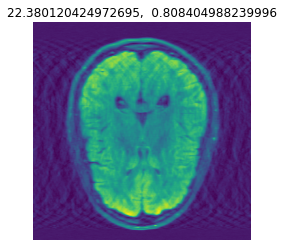

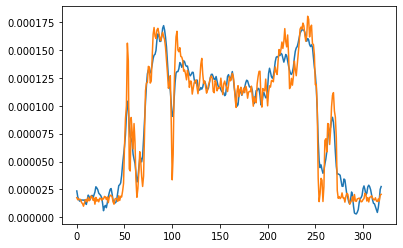

In [13]:
dirrec= sp.fft.ifftshift(sp.fft.ifft2(final_k,norm="ortho"))
implot(dirrec, title=f'{psnr_ssos(dirrec,real_img,mask=square_mask)},  {ssim_ssos(dirrec,real_img,mask=square_mask)}',mask=square_mask)

imsave(dirrec,'plots/offline_naive.png',mask=square_mask)
plt.figure()
plt.plot(abs(dirrec[320]))
plt.plot(abs(real_img[320]))

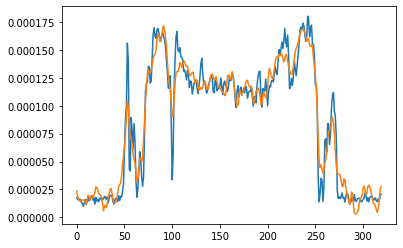

In [7]:
plt.plot(real_img[320])
plt.plot(abs(dirrec[320]))